<a href="https://colab.research.google.com/github/dudusoar/Project/blob/main/Airline_customer_value_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# set the system language to Chinese cuz the data includes Chinese characters
Sys.setlocale(locale = 'chs')

[1] ""


In [ ]:
%%R
air_cus_data <- read.csv('/content/drive/MyDrive/project/BI/air_cus_data.csv', encoding = 'UTF-8')

# Data Process

In [ ]:
%%R
# get the copy of the data
data <- air_cus_data
n <- length(data) # there are total 44 columns

In [ ]:
%%R
# overview and check if null exists
summary(data)

   MEMBER_NO       FFP_DATE         FIRST_FLIGHT_DATE     GENDER         
 Min.   :    6   Length:36946       Length:36946       Length:36946      
 1st Qu.:16074   Class :character   Class :character   Class :character  
 Median :32610   Mode  :character   Mode  :character   Mode  :character  
 Mean   :32125                                                           
 3rd Qu.:48995                                                           
 Max.   :62446                                                           
                                                                         
    FFP_TIER      WORK_CITY         WORK_PROVINCE      WORK_COUNTRY      
 Min.   :4.000   Length:36946       Length:36946       Length:36946      
 1st Qu.:4.000   Class :character   Class :character   Class :character  
 Median :4.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4.072                                                           
 3rd Qu.:4.000                        

In [ ]:
%%R
# Feature classification, put character type feature data together, and time class feature data together for easy viewing later
# String type data: gender, membership card level, work place city, work place province
# Time point data: membership time, first flight time, observation window end time, last flight date
c_string <- c("GENDER","FFP_TIER","WORK_CITY","WORK_PROVINCE","WORK_COUNTRY")
c_timespot <- c("FFP_DATE","FIRST_FLIGHT_DATE","LOAD_TIME","LAST_FLIGHT_DATE")

In [ ]:
%%R
# check if the ID is unique
checkdup <- duplicated(data$X.U.FEFF.MEMBER_NO)
which(checkdup == TRUE) # no duplicated ID

integer(0)


In [ ]:
%%R
# Check for outliers
data2 <- air_cus_data
which(data2[,-c(4,5,6,7,8)] < 0) # integer(0)
# Check for AGE
age_NA_position <- which(is.na(data$AGE))
which(is.na(data$AGE[-age_NA_position])) # integer(0)
which(data$AGE[-age_NA_position] == 0 )  # integer(0)
# ALL data from AGE >0 or null(not recorded)

integer(0)


In [ ]:
%%R
# Discard records with empty airfare
deleteNA1 <- data[-which(is.na(data$SUM_YR_1) | is.na(data$SUM_YR_2)), ]
deleteNA2 <- deleteNA1[-which((deleteNA1$SUM_YR_1==0) & (deleteNA1$SUM_YR_2==0)&(deleteNA1$WEIGHTED_SEG_KM==0)), ]
data <- deleteNA2

In [ ]:
%%R
# Convert character data to factors
data$GENDER <- factor(data$GENDER)
data$FFP_TIER <- factor(data$FFP_TIER)
data$WORK_CITY <- factor(data$WORK_CITY)
data$WORK_PROVINCE <- factor(data$WORK_PROVINCE)
data$WORK_COUNTRY <- factor(data$WORK_COUNTRY)
# Convert data to time type data
c_timespot <- c("FFP_DATE","FIRST_FLIGHT_DATE","LOAD_TIME","LAST_FLIGHT_DATE")
data$FFP_DATE <- as.Date(data$FFP_DATE,format='%Y/%m/%d')
data$FIRST_FLIGHT_DATE <- as.Date(data$FIRST_FLIGHT_DATE,format='%Y/%m/%d')
data$LOAD_TIME <- as.Date(data$LOAD_TIME,format='%Y/%m/%d')
data$LAST_FLIGHT_DATE <- as.Date(data$LAST_FLIGHT_DATE,format='%Y/%m/%d')

In [ ]:
%%R
# check the wrong time data
# First Fight Time should be less than or equal to Last Flight Time
time_index <- (data$FIRST_FLIGHT_DATE > data$LAST_FLIGHT_DATE)
data[which(time_index==1),]

      MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER FFP_TIER WORK_CITY
14797     45225 2011-01-15        2015-04-03 female        4      郑州
      WORK_PROVINCE WORK_COUNTRY AGE  LOAD_TIME FLIGHT_COUNT BP_SUM EP_SUM_YR_1
14797          河南           CN  48 2014-03-31            8   5502           0
      EP_SUM_YR_2 SUM_YR_1 SUM_YR_2 SEG_KM_SUM WEIGHTED_SEG_KM LAST_FLIGHT_DATE
14797           0        0     7030      14245         8126.28       2014-03-24
      AVG_FLIGHT_COUNT AVG_BP_SUM BEGIN_TO_FIRST LAST_TO_END AVG_INTERVAL
14797                1     687.75            432           8     41.57143
      MAX_INTERVAL ADD_POINTS_SUM_YR_1 ADD_POINTS_SUM_YR_2 EXCHANGE_COUNT
14797          128                   0                   0              0
      avg_discount P1Y_Flight_Count L1Y_Flight_Count P1Y_BP_SUM L1Y_BP_SUM
14797    0.5704654                0                8          0       5502
      EP_SUM ADD_Point_SUM Eli_Add_Point_Sum L1Y_ELi_Add_Points Points_Sum
14797      0         

In [ ]:
%%R
# remove
deletdata_time <- data[-which(time_index==1),]
data <- deletdata_time

# EDA

In the given data, the 44 characteristic information is divided into three categories: basic customer information, flight information, and point information. Therefore, a preliminary analysis of these three types of information is carried out first.

### basic customer information

In [ ]:
%%R
library(ggplot2)

In [ ]:
%%R
# see the membership level
summary(data$FFP_TIER)
# among the nearly 35,000 member data, there are only 600 level 6 members

    4     5     6 
34374  1473   600 


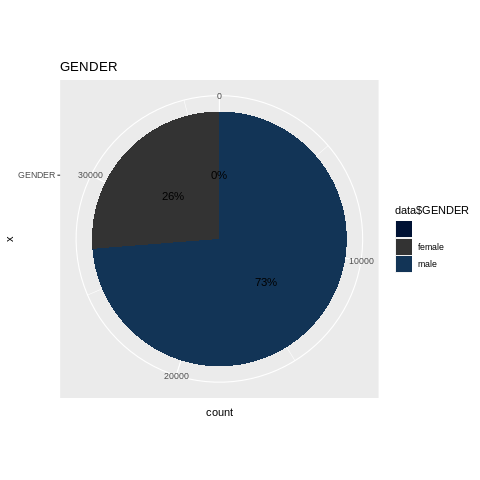

In [ ]:
%%R
# see the gender
GENDER <- data.frame(data$GENDER)
ggplot(GENDER, mapping=aes(x="GENDER",fill=data$GENDER))+
  geom_bar(stat="count",width=0.5,position='stack') +
  coord_polar("y", start=0) + 
  scale_fill_manual(values=c("#001234", "#333333", "#123456"))  + geom_text(stat="count",aes(label = scales::percent(..count../36946)), size=4, position=position_stack(vjust = 0.5))+ ggtitle("GENDER")

In [ ]:
%%R
# see the location
#table function counts the levels of each factor in airdata1$WORK_COUNTRY
WORK_COUNTRY <- as.data.frame(table(data$WORK_COUNTRY))
WORK_COUNTRY[order(WORK_COUNTRY$Freq, decreasing = T),]
# It can be seen that the vast majority of customers are concentrated in China. 2, 3, and 4 are all in Asia
# It can be considered that the company's business income is currently completely dependent on revenue in Asia.

    Var1  Freq
25    CN 33195
58    KR   690
53    JP   675
44    HK   439
102   US   356
8     AU   149
90    SG   125
99    TW    98
37    FR    92
68    MY    70
79    PH    59
106   VN    45
47    ID    44
18    CA    34
28    DE    32
96    TH    32
73    NL    30
64    MO    21
52    IT    18
107   VT    16
80    PK    14
101   UK    13
4     AN    10
50    IN    10
56    KH    10
111   中    10
12    BE     8
3     AE     6
7     AT     5
32    ES     5
38    GB     5
49    IL     5
21    CH     4
67    MX     4
72    NI     4
75    NZ     4
29    DK     3
46    HU     3
54    KA     3
71    NG     3
89    SE     3
105   UZ     3
109   ZA     3
1     AA     2
5     AR     2
9     AZ     2
31    EG     2
39    GE     2
51    IR     2
59    KZ     2
60    LA     2
61    LB     2
62    MA     2
70    NE     2
88    SA     2
91    SI     2
93    SN     2
98    TR     2
100   UA     2
104   UY     2
2     AB     1
6     AS     1
10    BB     1
11    BD     1
13    BG     1
14    BI   

In [ ]:
%%R
# see the key cities
summary(data$WORK_CITY)

      广州       北京       上海       深圳       大连   乌鲁木齐       沈阳 
      5548       4351       2893       1981       1347        982        925 
      长春                  武汉     哈尔滨     沈阳市       郑州       佛山 
       896        756        677        491        488        480        454 
                 长沙       杭州     上海市       东莞       南京       贵阳 
       413        379        341        333        325        323        289 
      汕头       珠海       成都       青岛       厦门     北京市       西安 
       280        277        266        261        226        206        206 
      天津       重庆       中山       南宁       昆明       湛江       海口 
       176        175        153        149        145        124        123 
      顺德       番禺     库尔勒       苏州     武汉市     大连市         HK 
       117        107        106        106        103         99         86 
      温州       济南       宁波       香港       大庆       福州          - 
        80         79         78         78         77         75         72 
      哈

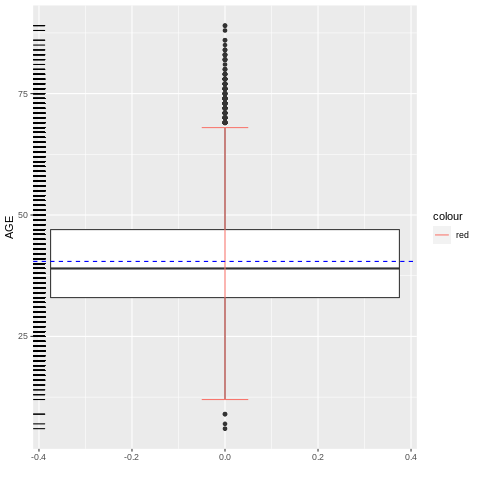

In [ ]:
%%R
# see AGE
ggplot(data,aes(y=AGE)) +
geom_boxplot(na.rm = T) + stat_boxplot(geom = "errorbar",width=0.1,aes(color="red"), na.rm = T) +
geom_hline(yintercept=mean(data$AGE, na.rm = TRUE),
linetype=2, color="blue") +
geom_rug() +
ylab("AGE") +
xlab("")

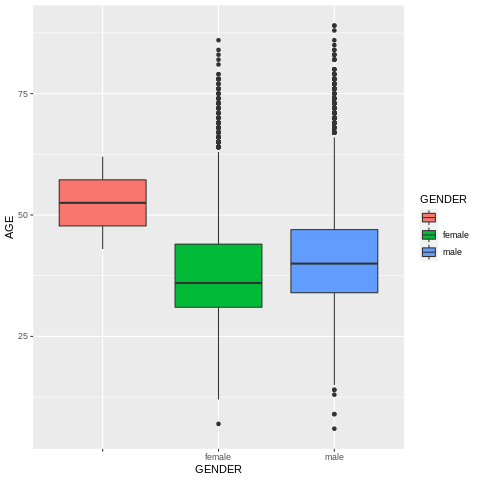

In [ ]:
%%R
ggplot(data,aes(x=GENDER,y=AGE))+
geom_boxplot(aes(fill=GENDER),na.rm = T)

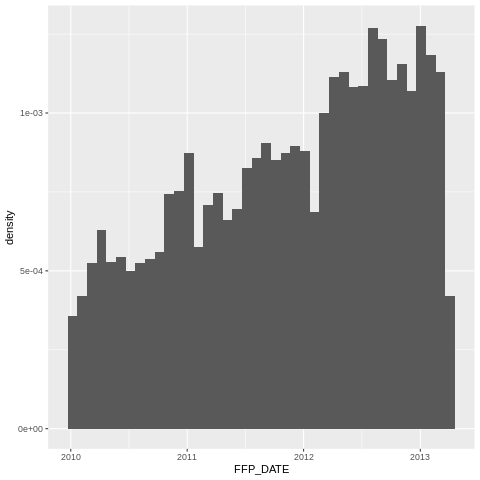

In [ ]:
%%R
# see Membership time
ggplot(data,aes(x=FFP_DATE)) +
geom_histogram(aes(y=..density..), bins = 40, na.rm = T)

## flight information

In [ ]:
%%R
# number of flights
summary(data$FLIGHT_COUNT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     6.0    10.2    13.0   197.0 


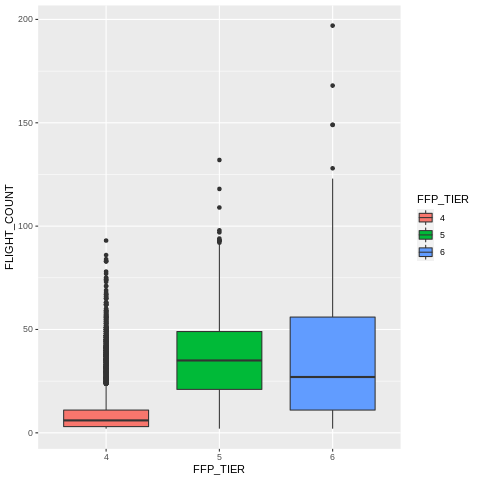

In [ ]:
%%R
# See the difference in the number of flights between different tiers
ggplot(data,aes(x=FFP_TIER,y=FLIGHT_COUNT))+
geom_boxplot(aes(fill=FFP_TIER),na.rm = T)

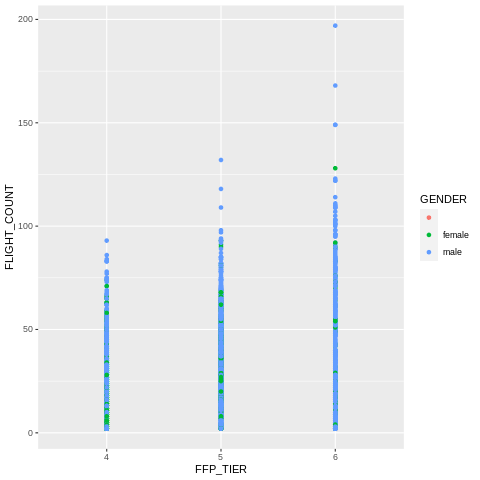

In [ ]:
%%R
# add GENDER information
ggplot(data,aes(x=FFP_TIER,y=FLIGHT_COUNT,color=GENDER)) + geom_point()

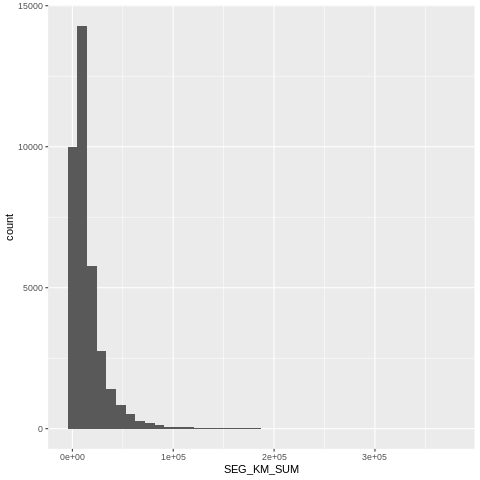

In [ ]:
%%R
# Kilometers flown
ggplot(data,aes(x=SEG_KM_SUM)) +
geom_histogram(aes(y=..count..), bins = 40, na.rm = T) #80/20

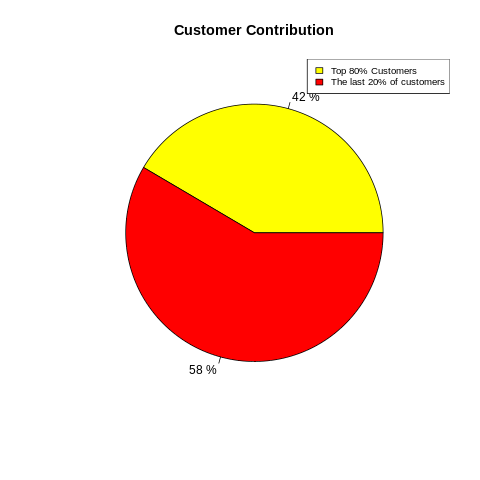

In [ ]:
%%R
# see the benefits
data$SUM_YR <- data$SUM_YR_1 + data$SUM_YR_2
revenue <- data[order(data$SUM_YR),] 
#Calculate 80% and 20% quantiles
sales <- c(sum(revenue$SUM_YR[1:29160]),sum(revenue$SUM_YR[29161:36447])) 
names <- c("Top 80% Customers","The last 20% of customers")
cols <- c("#FFFF00", "#FF0000")
piepercent = paste(round(100*sales/sum(sales)), "%")
#Plot
pie(sales, labels=piepercent, main = "Customer Contribution",col=cols)
legend("topright", names, cex=0.8,fill = cols)

## member points analysis

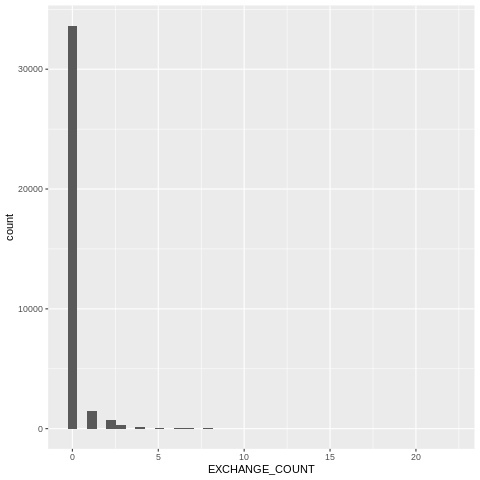

In [ ]:
%%R
# Points redemption times
ggplot(data,aes(x=EXCHANGE_COUNT)) +
geom_histogram(aes(y=..count..), bins = 40, na.rm = T)

# K-means cluster analysis

## Value Characteristic Analysis - LRMFC Model

**RFM model:**
- The basis of the LRMFC model is the RFM model. But the RFM model is not applicable in this analysis scenario. The traditional RFM model is based on the average value of each attribute. However, there are too many subdivided customer groups and the cost of precision marketing is too high. 
- Therefore, the LRFMC model clusters customers into important keeping customers, important development customers, important retention customers, general customers, and low-value customers, so as to formulate corresponding prices and services for each category of customers

**Analysis process**
- First of all, the clear goal is customer value identification. The most widely used model is three indicators (consumption time interval (Recency), consumption frequency (Frequency), consumption amount (Monetary)). These three metrics make up the RFM model, which is used to identify high-value customers.
- Consumption (Monetary), generally expresses the total amount of consumption over a period of time. However, because the air fare is affected by distance and class of service, the same amount has different value to the airline. Therefore, the indicator needs to be revised.
- Selected variables,
-- class factor = average value of discount coefficient corresponding to class = C;
-- distance factor = flight mileage accumulated in a certain period of time = M, and considering that, in the airline membership system, the length of the user's membership can be within a certain period of time. It affects customer value to a certain extent, so increase the indicator L = length of membership time = length of customer relationship. 
- Therefore, a total of five indicators are determined, the consumption time interval R, the customer relationship length L, the consumption frequency F, the flight mileage M and the average value C of the discount coefficient. The above indicators, as the value indicators of airlines to identify customers, are recorded as the LRFMC model

**Indicator description**
- L (Lifetime) refers to the time between the member's joining time and the end of the observation window.
- R (Recency) refers to the interval between the last flight and the end of the window.
- F (Frequency) refers to the number of times the customer takes the plane within the observation window.
- M (Monetary): Refers to the flight fare consumed by the customer during the two-year observation period.
- C (CostRadio): Refers to the average discount rate when customers fly during the observation period.

**Selection of indicators**
After knowing the five indicators of LRFMC, we need to filter out the indicators that can correspond to LRMFC from the 44 characteristic data.
- L: Obviously, according to the instructions, this indicator can be used: LOAD_TIME (the end of the observation window) - FFP_DATE (the time to join the membership)
Through L, we can easily distinguish new customers and old customers, which is convenient for us to classify and analyze the value.
- R: Choose LAST_TO_END. The longer the interval, the longer the customer has not used the airline's services, so it has less analytical value.
We tend to select data that has occurred recently to analyze trends.
- F: Choose FLIGHT_COUNT.
- M: Choose SEG_KM_SUM, which is an important data for analyzing the benefits brought by customers (converting revenue through distance), because the discount rate has been calculated for the fare information
not the initial data
- C: Choose AVG_DISCOUNT

In [ ]:
%%R
data$Length <- difftime(data$LOAD_TIME, data$FFP_DATE, units = "days") 
K_means <- data[,c("Length","FLIGHT_COUNT","SEG_KM_SUM","avg_discount")] 
K_means$Recency <-  -data[,"LAST_TO_END"] 
K_means$Length <- as.numeric(K_means$Length) 
summary(K_means) 

     Length        FLIGHT_COUNT     SEG_KM_SUM      avg_discount   
 Min.   : 365.0   Min.   :  2.0   Min.   :   368   Min.   :0.1120  
 1st Qu.: 579.0   1st Qu.:  3.0   1st Qu.:  4476   1st Qu.:0.6031  
 Median : 818.0   Median :  6.0   Median :  8988   Median :0.7057  
 Mean   : 862.4   Mean   : 10.2   Mean   : 14964   Mean   :0.7117  
 3rd Qu.:1128.0   3rd Qu.: 13.0   3rd Qu.: 18532   3rd Qu.:0.8026  
 Max.   :1550.0   Max.   :197.0   Max.   :375074   Max.   :1.5000  
    Recency      
 Min.   :-731.0  
 1st Qu.:-297.0  
 Median :-122.0  
 Mean   :-189.3  
 3rd Qu.: -35.0  
 Max.   :  -1.0  


In [ ]:
%%R
# data normalization
K_means1 <- scale(K_means)
head(K_means1)

     Length FLIGHT_COUNT SEG_KM_SUM avg_discount   Recency
1 1.7851114     5.408691   15.04107   1.38479986 0.9936611
2 0.5013438     3.944471   16.93368   0.64585217 0.9776619
3 1.5216968     4.633515   19.89393  -0.02050226 0.9296644
4 1.1099223     2.824773   13.64798   1.53186714 0.8923330
5 1.9879709     3.427687   14.09292   1.16307249 0.9989942
6 1.4914193     7.820348    8.68806   3.73261887 0.9723289


**Determining the optimal number of clusters for classification**

It is a very important issue to determine the optimal number of clusters during cluster analysis. For example, the kmeans function requires you to provide the parameter of the number of clusters.

The function fviz_nbclust() in the factoextra package is used in partition cluster analysis to determine and visualize the optimal number of clusters using the silhouette coefficient, WSS (within-cluster sum of squared errors)

fviz_nbclust(x, FUNcluster = NULL, method = c(“silhouette”, “wss”,), diss = NULL, k.max = 10, …)

FUNcluster: function for clustering, available values are: kmeans, cluster::pam, cluster::clara, cluster::fanny, hcut, etc.


method: the index used to evaluate the optimal number of clusters, silhouette is the silhouette coefficient, WSS is the squared error within the cluster and diss: dissimilarity matrix, an object generated by the dist() function, if set to NULL, it means using dist(data , method="euclidean") Calculate the data parameter to get the dissimilarity matrix; k.max: the maximum number of clusters, at least 2

In [ ]:
%%R
install.packages("factoextra")

In [ ]:
%%R
library(ggplot2)
library(factoextra)

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



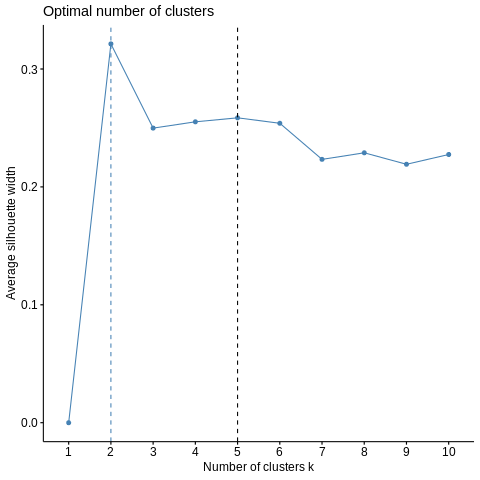

In [ ]:
%%R
x_var <- c(runif(4000,1,36448))
K_means2 <- K_means1[x_var,]
fviz_nbclust(K_means2, kmeans, method = "silhouette") + geom_vline(xintercept = 5, linetype = 2)

The optimal number of clusters can be determined using the simplest metric, the Within Sum of Square (WSS) within-group sum of squared errors. 

As the number of clusters increases, the number of each category becomes smaller and closer, so the WSS value must decrease with the increase of the number of clusters, so the focus is on the change of the slope, but the reduction of WWS When it is very slow, it is considered that the effect of further increasing the number of clusters cannot be enhanced. 

The existence of this "elbow point" is the optimal number of clusters, which decreases rapidly from one class to three classes, and then decreases very slowly, so The optimal number of clusters is selected as three

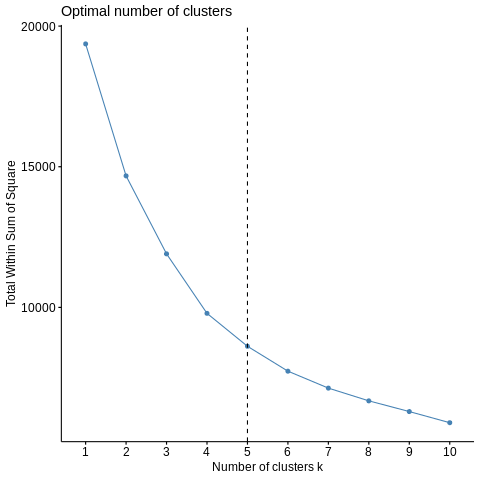

In [ ]:
%%R
fviz_nbclust(K_means2, kmeans, method = "wss") + geom_vline(xintercept = 5, linetype = 2)

K-means model

The k-means algorithm is one of the most widely used clustering algorithms. k-means takes k as a parameter, divides the data into k groups, and takes the mean value of all data samples in each group as the center point of the class through an iterative calculation process, so that the data in the group has a high similarity, while The similarity between groups is the lowest.

How k-means works:

Initialize the data and select k objects as center points.

Go through the entire dataset, calculate the distance of each point from each center point, and assign it to the group closest to the center.

Recalculate the mean of each group as the new cluster center.

In the above 2-3 steps, the process is repeated until the function converges and no new grouping occurs.

k-means clustering, suitable for continuous data sets. Euclidean distance is often used as a similarity measure when calculating distances between data samples. k-means supports a variety of distance calculations, including maximum, manhattan, pearson, correlation, spearman, kendall, etc.

In [ ]:
%%R
set.seed(1000)
kmeans_result <- kmeans(K_means1, 5)
print(kmeans_result)

Streaming output truncated to the last 5000 lines.
    4     2     4     4     4     4     5     4     4     4     2     5     5 
 4019  4020  4021  4022  4023  4024  4025  4026  4027  4028  4029  4030  4031 
    2     1     1     2     5     1     5     2     4     5     4     4     4 
 4032  4033  4034  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044 
    5     5     5     1     2     5     1     1     2     2     5     2     1 
 4045  4046  4047  4048  4049  4050  4051  4052  4053  4054  4055  4056  4057 
    5     4     4     5     1     4     4     4     5     1     4     4     1 
 4058  4059  4060  4061  4062  4063  4064  4065  4066  4067  4068  4069  4070 
    2     4     5     5     4     4     4     4     5     5     4     4     1 
 4071  4072  4073  4074  4075  4076  4077  4078  4079  4080  4081  4082  4083 
    1     1     4     5     4     4     3     5     5     2     5     4     5 
 4084  4085  4086  4087  4088  4089  4090  4091  4092  4093  4094  4095  4096 
 

In [ ]:
%%R
install.packages("fmsb")

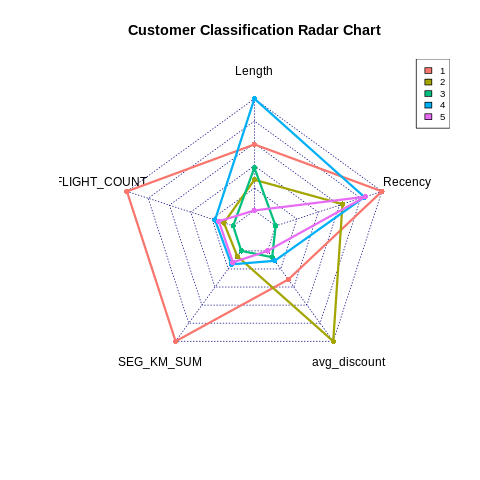

In [46]:
%%R
library(fmsb)
center1 <-  as.data.frame(kmeans_result$centers)
max <- apply(kmeans_result$centers, 2, max)
min <- apply(kmeans_result$centers, 2, min)
df = data.frame(rbind(max,min,kmeans_result$centers))
radarchart(df, seg=5, plty=1,plwd=3,pcol = c("#F8766D","#A3A500","#00BF7D","#00B0F6","#E76CF3"),title="Customer Classification Radar Chart",vlcex=1)
legend("topright", c("1","2","3","4","5"), cex=0.8,fill = c("#F8766D","#A3A500","#00BF7D","#00B0F6","#E76CF3"))

# Marketing strategy

The first type of customer (1): the numerical value of each item is outstanding, except for the two items of L and F. Such customers have a long flight distance and a large number of flights (frequent flights), which contribute a lot to the company, and are more loyal to the company. The company should actively maintain the relationship with such customers, strengthen preferential efforts, and design more reasonable discounts , to meet the individual needs of such passengers.

The second type of customer (2): This type of customer pays significantly more than other customer groups in terms of air ticket prices. Companies should increase their efforts to develop this group of customers and increase the frequency and distance they fly. Through appropriate discounts and discounts, in exchange for the benefits brought by the increase in quantity.

The third type of customer (3): Except for a long time to join the membership, all aspects are not outstanding, it is recommended to keep the same.

The fourth category of customers (4): The membership time is long, and the flight frequency is quite satisfactory, but they get great discounts and belong to the low-value group of old customers. The strategy of exchanging price concessions for the number of flights should then be considered further.

The fifth type of customer (5): It belongs to the new customer group, and the value brought by it needs to be observed after a period of time, and it is immature. After further data mining is required, a differentiation strategy is implemented for customers.